# Курс «Глубокое обучение в компьютерном зрении»

## Урок 1. Обработка изображений

## <font color='red'>Практическое задание</font>

Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.

Выполнил ___Соковнин ИЛ___

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt  # визуализация картинок
import numpy as np  # Для работы с тензорами (картинка это3d-массив, т.е. по сути тензор)

import imageio  # для загрузки изображения

import scipy.signal

from math import atan, tan, pi, sqrt, ceil, fabs, cos, sin, floor

__Загрузили исходную картинку__

In [2]:
img = imageio.imread('Богаевский Вечер у моря.jpg')
print(img.shape)

(910, 1159, 3)


In [3]:
img[:5, :5, :]

Array([[[100, 155, 219],
        [114, 169, 234],
        [ 81, 136, 201],
        [ 86, 139, 205],
        [101, 154, 220]],

       [[ 94, 149, 213],
        [ 58, 113, 177],
        [ 68, 121, 187],
        [ 70, 123, 189],
        [ 36,  89, 155]],

       [[ 93, 147, 211],
        [ 24,  78, 142],
        [ 78, 132, 196],
        [103, 156, 222],
        [ 48, 101, 167]],

       [[ 89, 143, 207],
        [ 70, 124, 188],
        [110, 164, 228],
        [102, 156, 220],
        [ 98, 152, 216]],

       [[ 87, 141, 203],
        [127, 181, 245],
        [117, 171, 235],
        [ 31,  82, 147],
        [104, 155, 220]]], dtype=uint8)

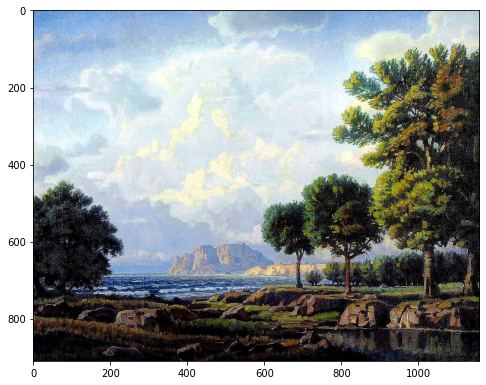

In [4]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

__Преобразование в float32 [0,1]__

In [5]:
img = img.astype(np.float32) / 255.  # Изменяем тип с int8 на float32

In [6]:
img[:5, :5, :]

Array([[[0.39215687, 0.60784316, 0.85882354],
        [0.44705883, 0.6627451 , 0.91764706],
        [0.31764707, 0.53333336, 0.7882353 ],
        [0.3372549 , 0.54509807, 0.8039216 ],
        [0.39607844, 0.6039216 , 0.8627451 ]],

       [[0.36862746, 0.58431375, 0.8352941 ],
        [0.22745098, 0.44313726, 0.69411767],
        [0.26666668, 0.4745098 , 0.73333335],
        [0.27450982, 0.48235294, 0.7411765 ],
        [0.14117648, 0.34901962, 0.60784316]],

       [[0.3647059 , 0.5764706 , 0.827451  ],
        [0.09411765, 0.30588236, 0.5568628 ],
        [0.30588236, 0.5176471 , 0.76862746],
        [0.40392157, 0.6117647 , 0.87058824],
        [0.1882353 , 0.39607844, 0.654902  ]],

       [[0.34901962, 0.56078434, 0.8117647 ],
        [0.27450982, 0.4862745 , 0.7372549 ],
        [0.43137255, 0.6431373 , 0.89411765],
        [0.4       , 0.6117647 , 0.8627451 ],
        [0.38431373, 0.59607846, 0.84705883]],

       [[0.34117648, 0.5529412 , 0.79607844],
        [0.49803922, 0.709

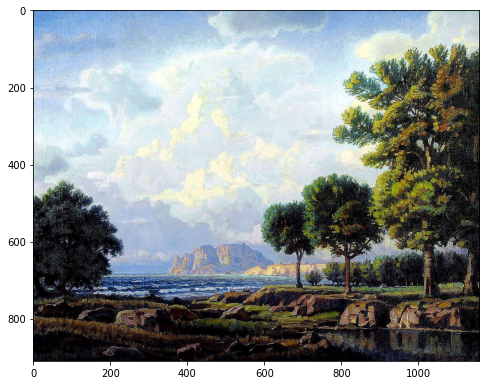

In [7]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

__Получили чернобелый вариант__

In [8]:
img_bw = np.mean(img, axis=2)

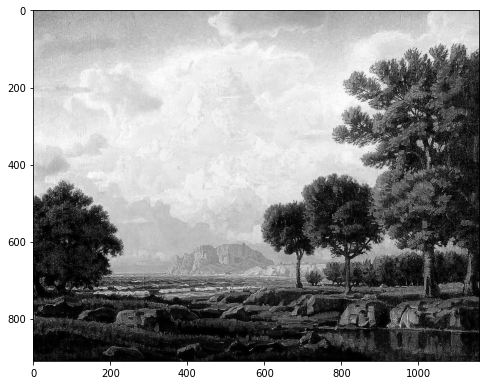

In [9]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

__Вырезали отдельный элемент__

In [10]:
# (769, 1357, 3)
img_crop = np.copy(img_bw[500:800, 200:700])

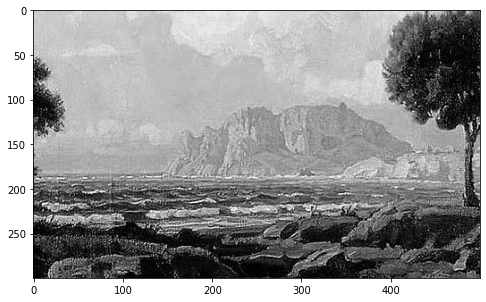

In [11]:
plt.figure(figsize=(8, 8))
plt.imshow(img_crop, cmap='gray')

In [12]:
print(img_crop.shape)

(300, 500)


__Определим границы объектов__

__Найдем вертикальные границы__

In [13]:
wv = [[-1,0,1], [-1,0,1], [-1,0,1]]

out_img_1 = np.zeros((img_bw.shape[0] - 2, img_bw.shape[1] - 2),  dtype=np.float32)
out_img_1 = np.abs(scipy.signal.correlate2d(img_bw, wv, mode='valid'))

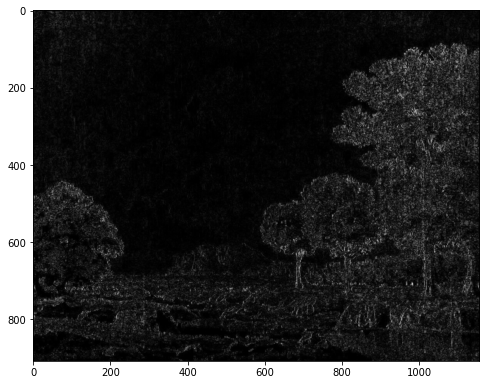

In [14]:
out_img_1 = out_img_1.astype(np.float32) / 255.

plt.figure(figsize=(8, 8))
plt.imshow(out_img_1, cmap='gray')

__Найдем горизонтальные границы__

In [15]:
wh = [[-1,-1,-1], [0,0,0], [1,1,1]]

out_img_2 = np.zeros((img_bw.shape[0] - 2, img_bw.shape[1] - 2),  dtype=np.float32)
out_img_2 = np.abs(scipy.signal.correlate2d(img_bw, wh, mode='valid'))

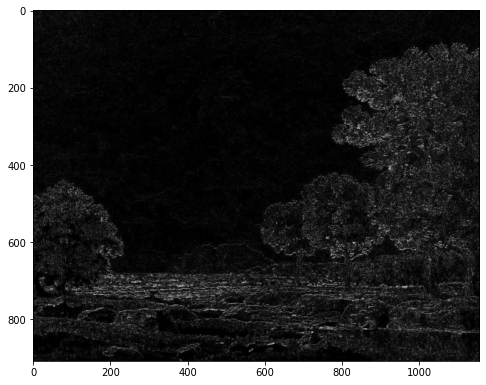

In [16]:
out_img_2 = out_img_2.astype(np.float32) / 255.

plt.figure(figsize=(8, 8))
plt.imshow(out_img_2, cmap='gray')

__Сложим получившиеся границы__

In [17]:
out_img = out_img_1 + out_img_2

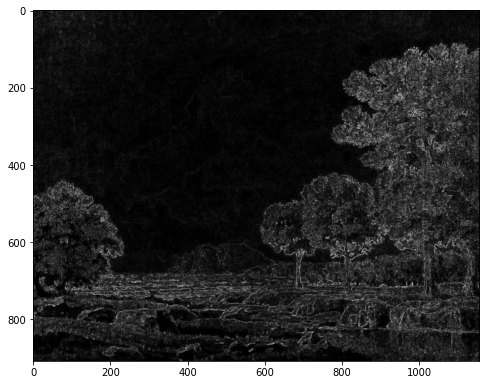

In [18]:
out_img = out_img.astype(np.float32) / 255.

plt.figure(figsize=(8, 8))
plt.imshow(out_img, cmap='gray')

##### Сделаем картинку более насыщенной

In [19]:
from skimage.color import rgb2hsv, hsv2rgb

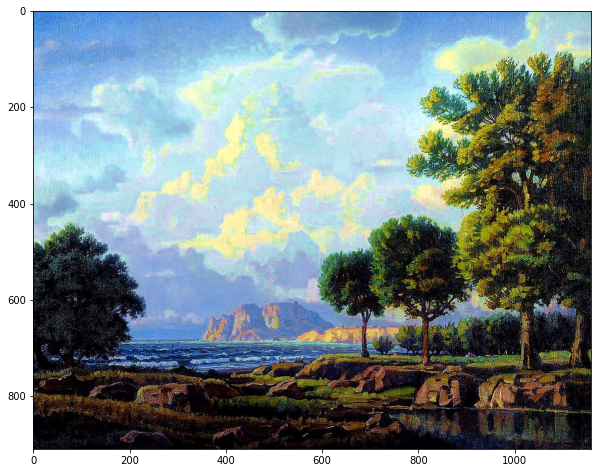

In [20]:
img_hsv = np.copy(rgb2hsv(img))
img_hsv[:, :, 1] **= 0.6
img_new = hsv2rgb(img_hsv)

plt.figure(figsize=(10, 10))
plt.imshow(img_new)

##### Свёртка изображения с ядром Собеля

In [21]:
wh = np.array([[-1, -2, -1],
               [ 0,  0,  0],
               [ 1,  2,  1]])
wv = np.array([[-1,  0,  1],
               [-2,  0,  2],
               [-1,  0,  1]])

In [22]:
out_img = []
for c in range(3):
    imgh = scipy.signal.correlate2d(img_new[:,:,c], wh, mode='valid')
    imgv = scipy.signal.correlate2d(img_new[:,:,c], wv, mode='valid')
    out_img.append((imgh**2 + imgv**2)**0.5)
out_img = np.stack(out_img, axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


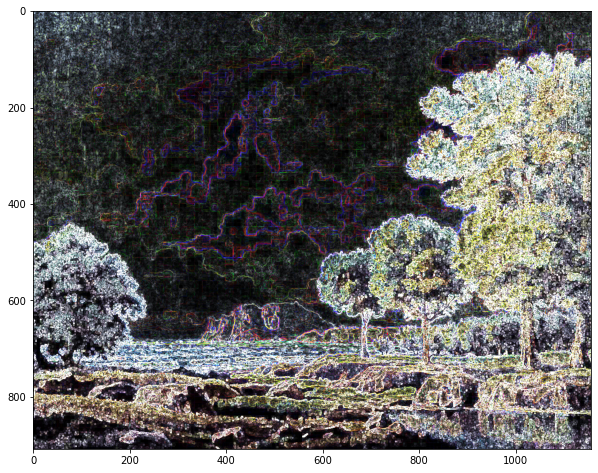

In [23]:
plt.figure(figsize=(10, 10))
plt.imshow(out_img)